**Dataset Overview**: The dataset consists of the following columns:

• **Size (sq. ft.)**: Size of the house in square feet.

• **Bedrooms**: Number of bedrooms in the house.

• **Age**: Age of the house in years.

• **Proximity** to Downtown (miles): Distance of the house from the downtown area.

• **Price**: Actual price of the house (in thousands of dollars).

# Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Exploration and Visualization

In [4]:
# Load the dataset
df = pd.read_csv('datasets_house_prices.csv')

We will create scatter plots to visualize the relationships between house prices and their features.

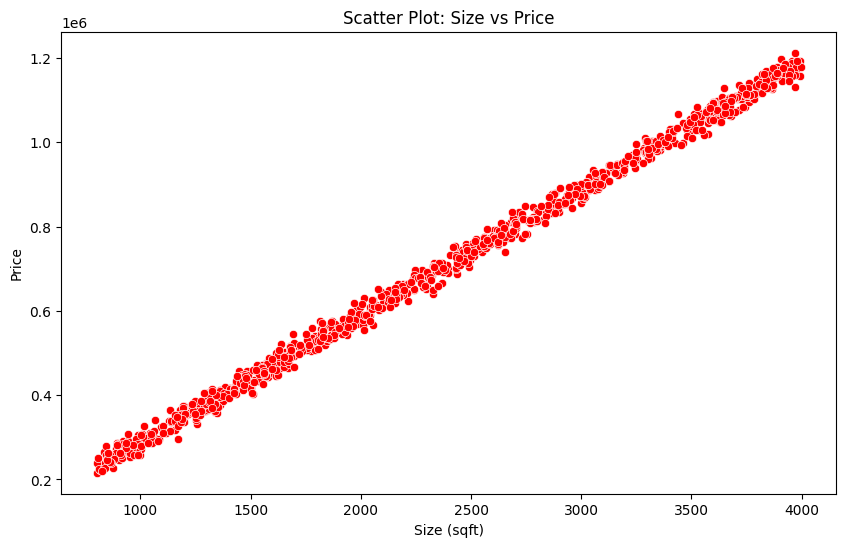

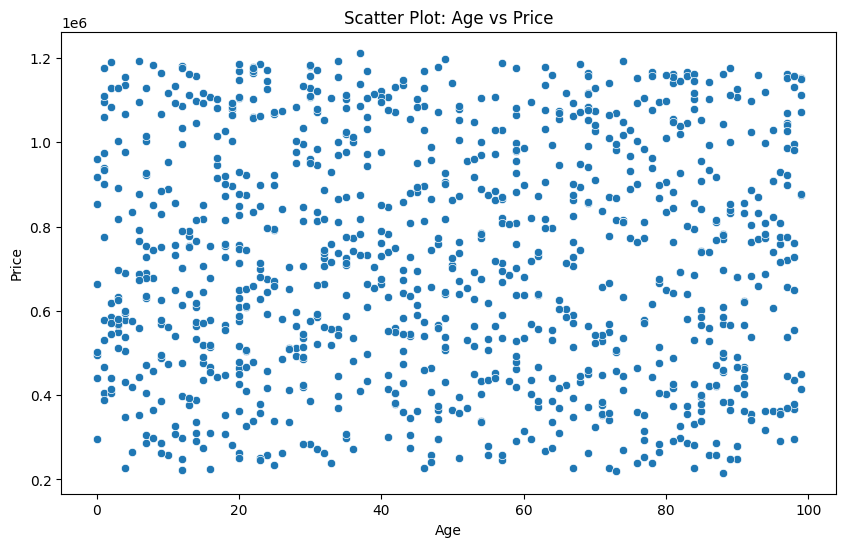

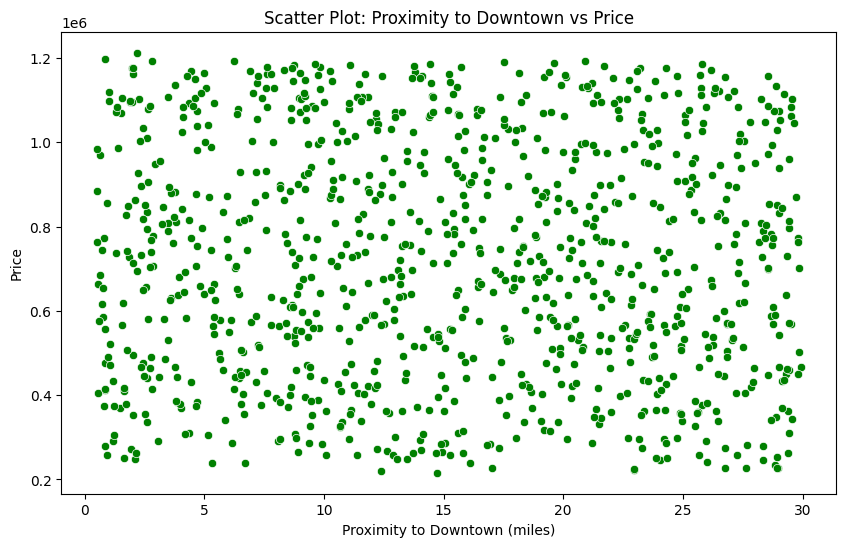

In [6]:
# Scatter plot for Size vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size (sqft)', y='Price', color='red')
plt.title('Scatter Plot: Size vs Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.show()

# Scatter plot for Age vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Price')
plt.title('Scatter Plot: Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

# Scatter plot for Proximity to Downtown vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Proximity to Downtown (miles)', y='Price', color='green')
plt.title('Scatter Plot: Proximity to Downtown vs Price')
plt.xlabel('Proximity to Downtown (miles)')
plt.ylabel('Price')
plt.show()

Next, we will create histograms to analyze the distribution of price and other numerical features.

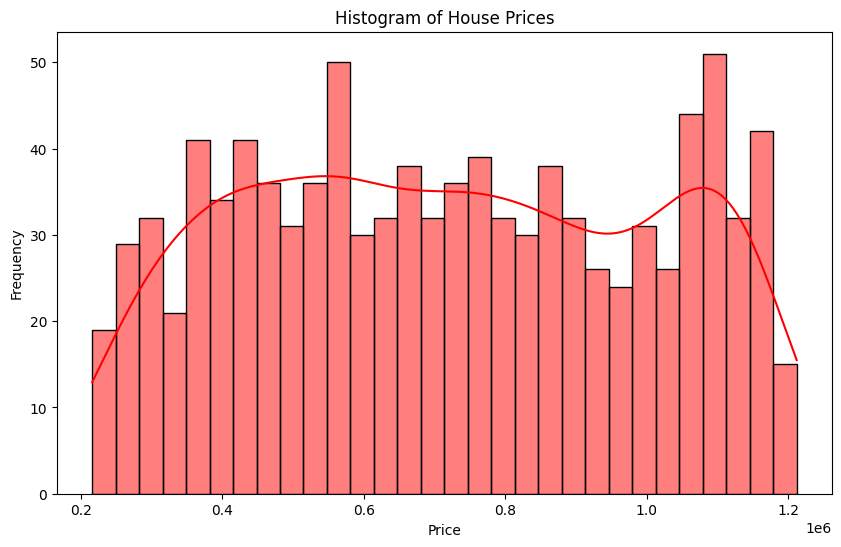

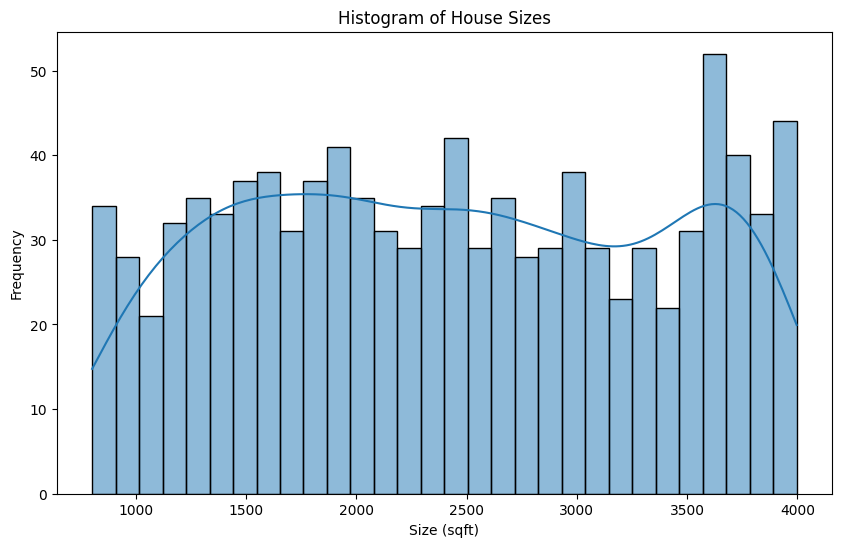

In [7]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='red')
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for Size
plt.figure(figsize=(10, 6))
sns.histplot(df['Size (sqft)'], bins=30, kde=True)
plt.title('Histogram of House Sizes')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

Lastly, we will create a correlation matrix to assess the strength and direction of relationships between features.

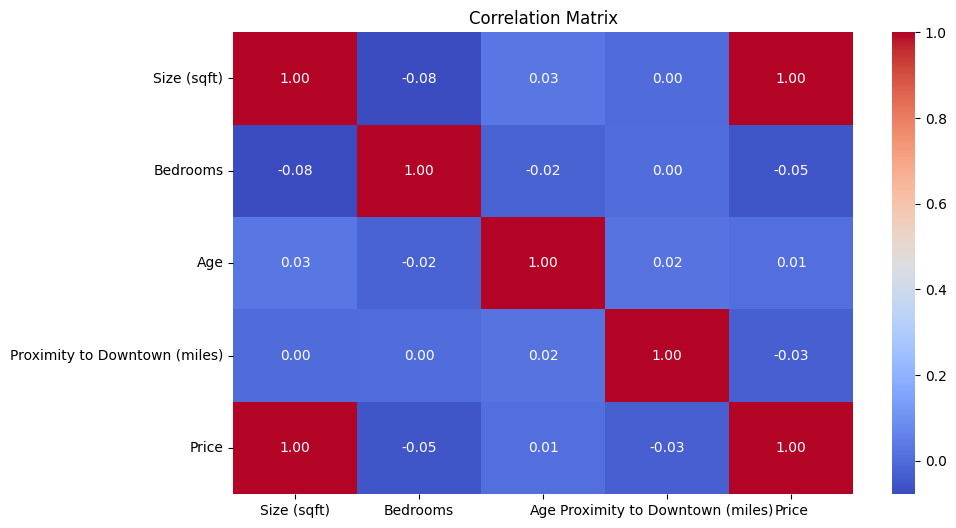

In [8]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

Identify and address missing values by either filling them with a specific value (such as the mean or median) or by removing the affected rows or columns.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print(missing_values)

# Fill missing values with the mean (or median) for numerical columns
df.fillna(df.mean(), inplace=True)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Normalization adjusts data to a range of [0, 1], whereas standardization centers data with a mean of 0 and a standard deviation of 1. Use `MinMaxScaler` for normalization and `StandardScaler` for standardization.

In [12]:
# Normalize the data
scaler = MinMaxScaler()
df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price']] = scaler.fit_transform(
    df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price']]
)

In [19]:
# Standardize the data
scaler = StandardScaler()
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
df[features] = scaler.fit_transform(df[features])

# Model Development

We will divide the dataset into training and testing sets with a 70-30 split.

In [20]:
# Define features and target variable
X = df[features]
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will utilize the `LinearRegression` model from Scikit-learn.

In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Calculate Adjusted R-squared
n = len(y_test)
p = len(model.coef_)
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

Mean Squared Error: 0.00
R-squared: 1.00
Adjusted R-squared: 1.00


We can create a DataFrame that includes feature names alongside their coefficients for interpretation.

In [27]:
# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

print(coef_df)

                         Feature  Coefficient
0                    Size (sqft)     1.000477
1                       Bedrooms     0.024403
2                            Age    -0.021815
3  Proximity to Downtown (miles)    -0.030339


We can visualize the model's accuracy by plotting predicted prices against actual prices in the test set.

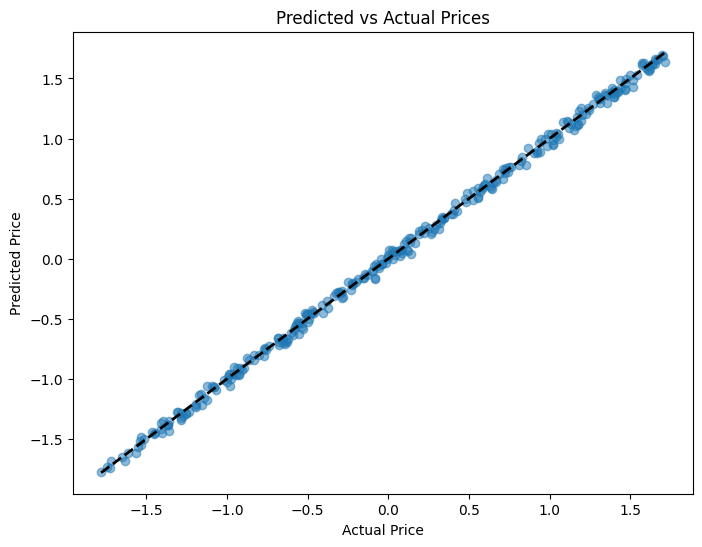

In [32]:
# Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()